# Homework 1

To answer the following questions, consider using the sklearn API documentation and the notebooks in
the course webpage as guidance. Show in your PDF report both the code and the corresponding results.
Consider the column_diagnosis.arff data available at the homework tab, comprising 6 biomechanical
features to classify 310 orthopaedic patients into 3 classes (normal, disk hernia, spondilolysthesis). 

In [8]:
import pandas as pd
from scipy.io.arff import loadarff

data = loadarff('data/column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')


df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


1) [1.5v] Apply f_classif from sklearn to assess the discriminative power of the input variables.
Identify the input variable with the highest and lowest discriminative power.
Plot the class-conditional probability density functions of these two input variables.

In [13]:
from sklearn.feature_selection import f_classif

X, y = df.drop('class', axis=1), df['class']

scores = list(zip(X.columns.values, f_classif(X, y)[0]))
scores.sort(key=(lambda x: x[1]))

print(scores)

[('pelvic_radius', 16.86693475538006), ('pelvic_tilt', 21.299194328989202), ('sacral_slope', 89.64395329777439), ('pelvic_incidence', 98.53970917437658), ('lumbar_lordosis_angle', 114.98284047330131), ('degree_spondylolisthesis', 119.12288060759764)]


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

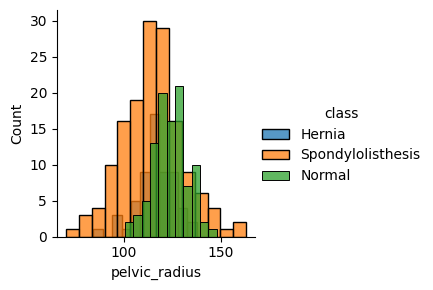

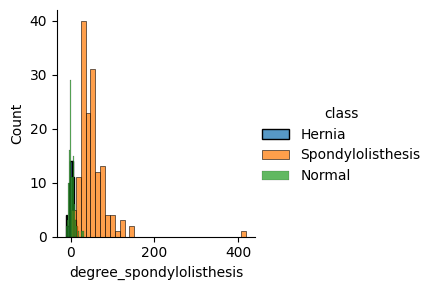

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Meter histogramas ou densidade estimada (kernel)

plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "pelvic_radius").add_legend()
  
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "degree_spondylolisthesis").add_legend()
  
plt.show()